In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "data/data_complete.csv"
import pandas as pd

data = pd.read_csv(data_path)
data = data.iloc[:, 2:]
# data.corr()

In [3]:
import DataLoader, Machine_Model, Engine
import torch

train_percent = 0.7
val_percent = 0.3
test_percent = None
batch_size = 100

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(Information.features)
INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4

model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)

model1 = Machine_Model.NN_V0(input_size=11, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 1200
loss_fn = torch.nn.MSELoss()
learning_rate = 0.032
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)
optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=0.0085)

engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                               test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False, resolution=1)



1 1


  0%|          | 0/1200 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [18]:
import DataLoader, Machine_Model, Engine
import torch

cr = True
while cr:
    train_percent = 0.7
    val_percent = 0.3
    test_percent = None
    batch_size = 100

    dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                         test_percent=test_percent, batch_size=batch_size)
    train, val, test = dataloader.fit()

    try:
        print(len(train), len(val), len(test))
    except:
        print(len(train), len(val))

    # INPUT_SIZE = len(Information.features)
    INPUT_SIZE = 1
    HIDDEN_UNITS = 64
    OUTPUT_SIZE = 1
    DEPTH = 2

    model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=25, depth_number=DEPTH)

    model1 = Machine_Model.NN_V0(input_size=39, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

    EPOCHS = 4000
    loss_fn = torch.nn.MSELoss()
    learning_rate = 0.00185
    optimizer = torch.optim.Adam(model0.parameters(), learning_rate, weight_decay=0.00007)
    optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=0.03)

    engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                                   test_dataloader=test)
    model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                                  early_stop_patience=None, writer=False, resolution=1)
    if model0_results["val_loss"][-1] < 0.03:
        cr = False
    # cr = False


1 1


  0%|          | 0/4000 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.256705 Accuracy -8.4142 | validation: Loss 0.250576 Accuracy -14.7419
Epoch 2 | train: Loss 0.198098 Accuracy -6.2649 | validation: Loss 0.154834 Accuracy -8.7271
Epoch 3 | train: Loss 0.148643 Accuracy -4.4512 | validation: Loss 0.089753 Accuracy -4.6386
Epoch 4 | train: Loss 0.107975 Accuracy -2.9598 | validation: Loss 0.056463 Accuracy -2.5472
Epoch 5 | train: Loss 0.075539 Accuracy -1.7703 | validation: Loss 0.053922 Accuracy -2.3876
Epoch 6 | train: Loss 0.052564 Accuracy -0.9277 | validation: Loss 0.081504 Accuracy -4.1203
Epoch 7 | train: Loss 0.040374 Accuracy -0.4807 | validation: Loss 0.135665 Accuracy -7.5229
Epoch 8 | train: Loss 0.040283 Accuracy -0.4773 | validation: Loss 0.198504 Accuracy -11.4706
Epoch 9 | train: Loss 0.049359 Accuracy -0.8101 | validation: Loss 0.238238 Accuracy -13.9668
Epoch 10 | train: Loss 0.056677 Accuracy -1.0785 | validation: Loss 0.245074 Accuracy -14.3963
Epoch 11 | train: Loss 0.056686 Accuracy -1.0789 | validation: Lo

80


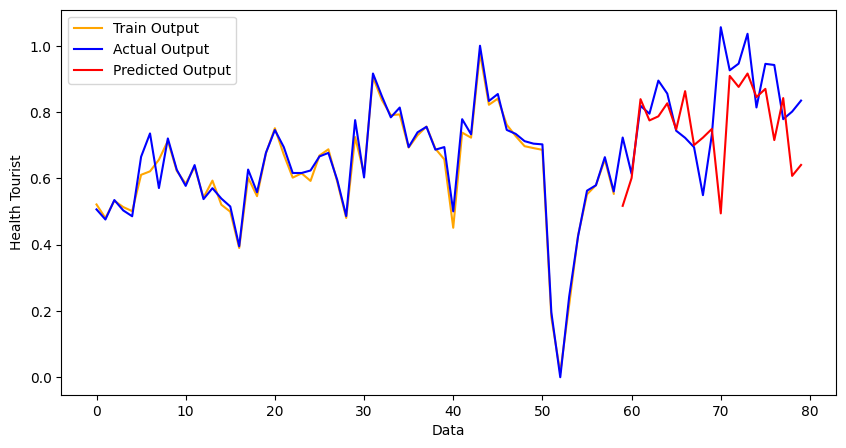

In [82]:
engine.plot_predict_real()

In [85]:
len(dataloader.val_dataloader.dataset)

21

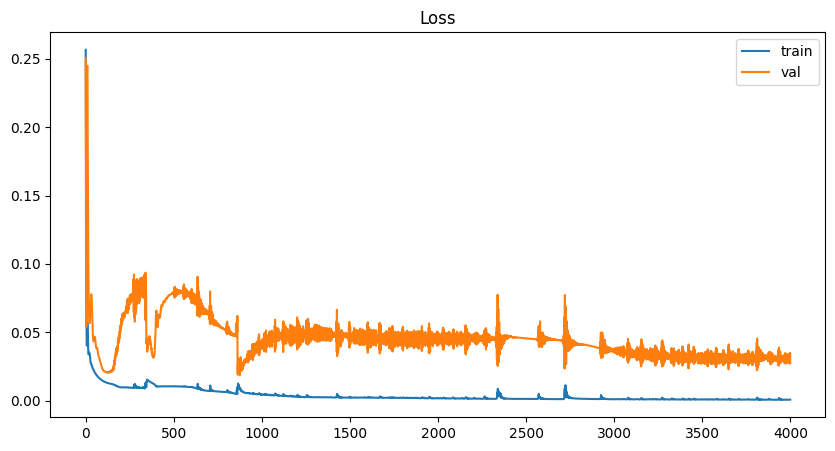

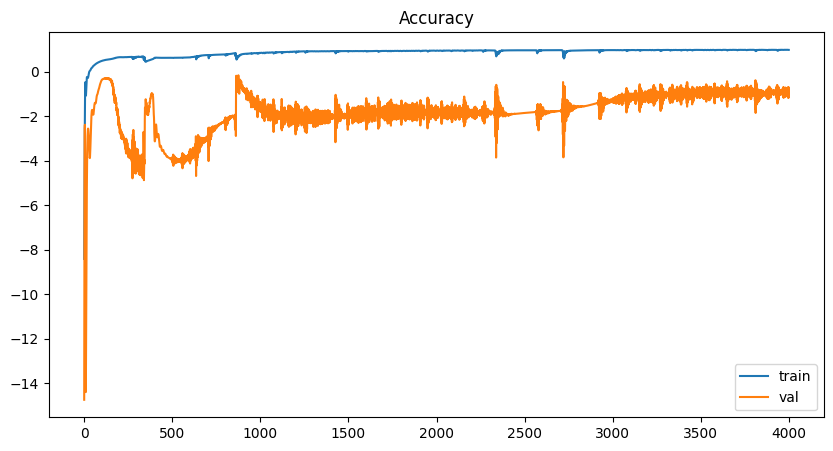

In [70]:
engine.plot_loss()
engine.plot_acc()

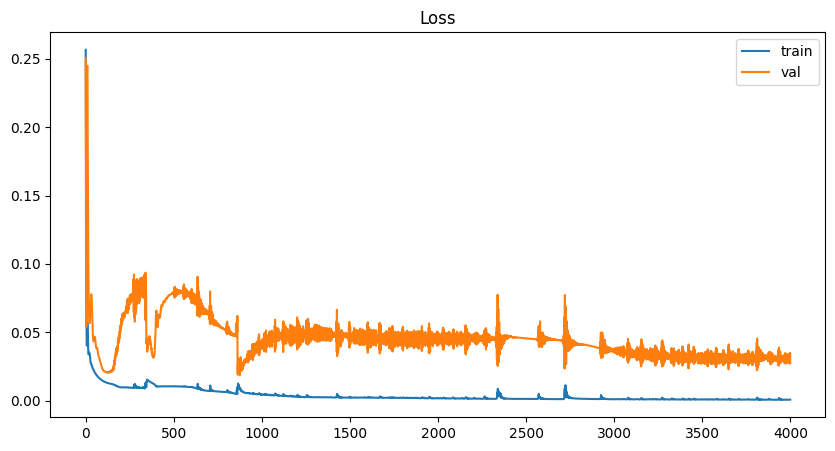

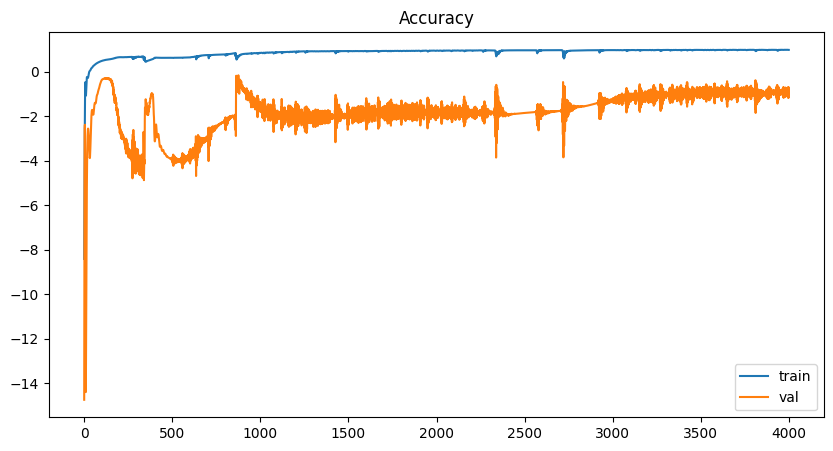

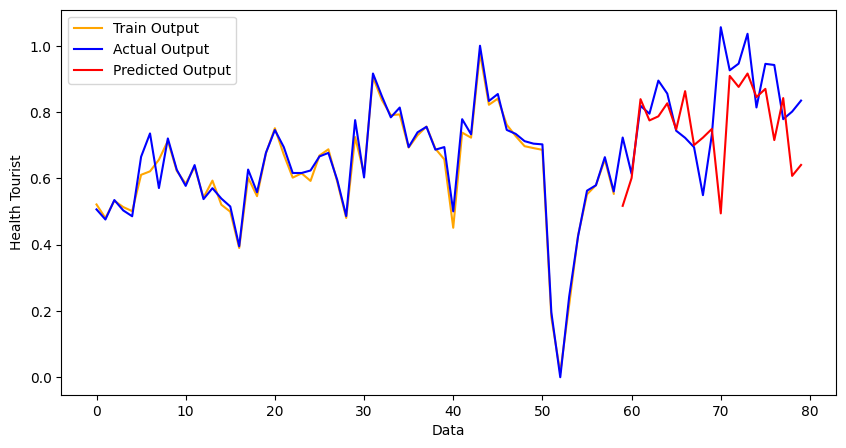

In [81]:
engine.save()
engine.plot_loss(save=True)
engine.plot_acc(save=True)

engine.plot_predict_real(save=True)

In [318]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.
[INFO] There is no test in your data


ValueError: 

In [30]:
import Information
import numpy as np

data[Information.features].iloc[-8:-1, :]

,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,covid,month,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_bus_outside,number_of_travels_minibus_outside,number_of_person_minibus_outside
88,3583.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,5,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
89,3870.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,6,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
90,3162.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,7,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
91,3581.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,8,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
92,3570.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,9,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
93,3049.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,10,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0
94,3122.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,11,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0


In [62]:
data1 = np.array(data[Information.features].iloc[-8:-1, :])
ne = list(data1[-1])[1:]
features1 = [ne]
features2 = [ne, ne, ne, ne, ne]
features3 = []

f3 = ne.copy()
f3[0] = f3[0]+0.2*f3[0]
f3[6] = 1
for _ in range(25):
    features3.append(f3)

In [68]:
engine.predict(x=data1, features_data=features1, y_scaler=dataloader.scaler_y, x_scaler=dataloader.scaler_x, reset=True)


,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,covid,month,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_bus_outside,number_of_travels_minibus_outside,number_of_person_minibus_outside,y
0,3122.000000,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,11.0,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0,2181.555908
0,2181.555908,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,0.0,11.0,4639.0,4270.0,822597.0,47243.0,2312.0,6923.0,2256.544189


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [50]:
import numpy as np

x3 = np.array([[2870, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2780, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2319, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2901, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [3933, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3519, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3583, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3870, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0]])

features = [[5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
            [5751, 5714, 591908, 9468, 153304, 51022, 3441, 1],
            [5751, 5714, 591908, 9468, 153304, 51022, 3441, 2],
            [5751, 5714, 591908, 9468, 153304, 51022, 3441, 3],
            [5751, 5714, 591908, 9468, 153304, 51022, 3441, 4]]


In [51]:
engine.predict(x=x3, features_data=features, y_scaler=dataloader.scaler_y, x_scaler=dataloader.scaler_x)

,y,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_minibus_inside,number_of_person_bus_inside,number_of_travels_bus_outside,number_of_travels_minibus_outside,covid,y
0,3870.000000,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3125.854004
0,3125.854004,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,0.0,3441.001709
0,3441.001709,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,1.0,3047.370361
0,3047.370361,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,2.0,3053.028320
0,3053.028320,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,3.0,3022.228271
0,3022.228271,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,4.0,3046.853027


In [45]:
features

[[5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0]]

In [23]:
engine.t2

array([[3150.4524]], dtype=float32)

In [24]:
engine.prediction

,y,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_minibus_inside,number_of_person_bus_inside,number_of_travels_bus_outside,number_of_travels_minibus_outside,covid,y
0,3870.000000,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3150.452393
0,3150.452393,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,0.0,3524.059082
0,3524.059082,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,0.0,3485.399170
0,3870.000000,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3150.452393
0,3150.452393,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,0.0,3524.059082
0,3524.059082,5751.0,5714.0,591908.0,9468.0,153304.0,51022.0,3441.0,0.0,3485.399170
0,3870.000000,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3150.452393


In [25]:
engine.t3

[[5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
 [5751, 5714, 591908, 9468, 153304, 51022, 3441, 0]]